# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

import random

random.seed(100)
torch.manual_seed(100)
torch.use_deterministic_algorithms(False)

# Base de Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
root = '/content/drive/MyDrive/Python_Archivos/data.csv'
data = pd.read_csv(root, index_col = False)

In [4]:
data = data.drop('Unnamed: 32', axis = 1)
data = data.drop('id', axis = 1)

In [5]:
mapDiagnosis = {'M': 0, 'B' : 1}
data['diagnosis'] = data['diagnosis'].map(mapDiagnosis)

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [55]:
columns = list(data)

x_data = data[columns[1:30]]
y_data = data[columns[0]]

x_data.shape, y_data.shape

((569, 29), (569,))

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 20)

# KNN

In [10]:
modelo_knn = KNeighborsClassifier(n_neighbors= 10)
modelo_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

              precision    recall  f1-score   support

           0       0.98      0.90      0.93        48
           1       0.93      0.98      0.96        66

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



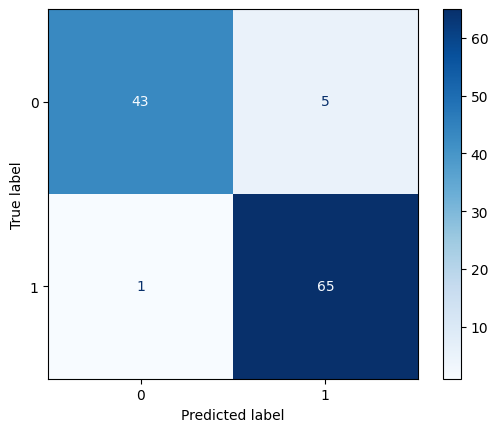

In [11]:
prediction_knn = modelo_knn.predict(x_test)

results_knn = metrics.classification_report(y_true = y_test, y_pred = prediction_knn)
print(results_knn)

#Confusion Matrix
cm_knn = metrics.confusion_matrix(y_true = y_test, y_pred = prediction_knn)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot(cmap = 'Blues')
plt.show()

# Características

1. radius_mean : 0.912281
2. texture_mean : 0.921053
3. perimeter_mean : 0.921053
4. area_mean : 0.929825
5. smoothness_mean : 0.929825
6. compactness_mean : 0.929825
7. concavity_mean : 0.929825
8. concave points_mean : 0.929825
9. symmetry_mean : 0.929825
10. fractal_dimension_mean : 0.929825
11. radius_se : 0.929825
12. texture_se : 0.929825
13. perimeter_se : 0.929825
14. area_se : 0.929825
15. smoothness_se : 0.929825
16. compactness_se : 0.929825
17. concavity_se : 0.929825
18. concave points_se : 0.929825
19. symmetry_se : 0.929825
20. fractal_dimension_se : 0.929825
21. radius_worst : 0.929825
22. texture_worst : 0.929825
23. perimeter_worst : 0.947368
24. area_worst : 0.973684
25. smoothness_worst : 0.973684
26. compactness_worst : 0.973684
27. concavity_worst : 0.973684
28. concave points_worst : 0.973684
29. symmetry_worst : 0.973684
30. fractal_dimension_worst : 0.973684


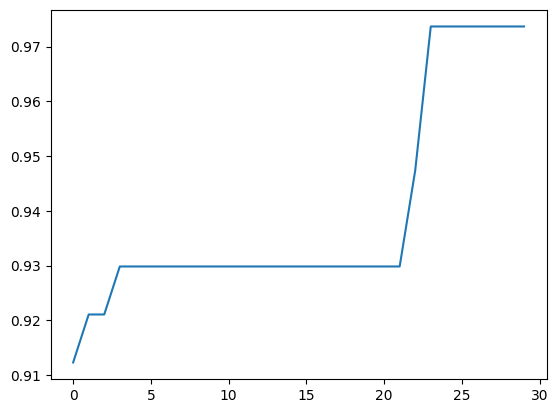

In [18]:
modelo_knn = KNeighborsClassifier(n_neighbors= 10)
y_data = data[columns[0]]
accuracy_list = []

for i in range(2, 32):
  x_data = data[columns[1: i]]
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

  modelo_knn.fit(x_train, y_train)
  y_pred = modelo_knn.predict(x_test)
  accuracy_list.append(accuracy_score(y_test, y_pred))

plt.plot(accuracy_list)
for i in range(len(accuracy_list)):
  print(f'{i + 1}. {columns[i + 1]} : {accuracy_list[i]:.6f}' )

# Pearson

In [30]:
correlacion = abs(data.corr(method = 'pearson', numeric_only = True)['diagnosis'])
column_b = correlacion[1:][correlacion > 0.7]
column_b

radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
concave points_mean     0.776614
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
concave points_worst    0.793566
Name: diagnosis, dtype: float64